## Nonlineaer boundary

In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

In [2]:
import matplotlib.pyplot as plt

In [3]:
data=[X,y]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

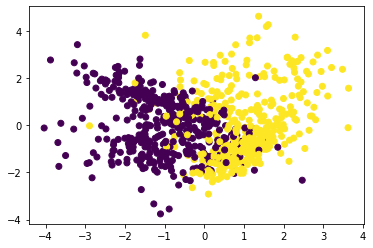

In [5]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

### logistic regression

In [6]:
# logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# fitting
clf.fit(X_train, y_train)

LogisticRegression()

In [7]:
# prediction
clf.predict_proba([[5,5],[-4,-4]])

array([[2.13315566e-05, 9.99978668e-01],
       [9.99838544e-01, 1.61455683e-04]])

In [8]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test))

0.855

In [9]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[80, 15],
       [14, 91]])

### Decision tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
tree = DecisionTreeClassifier()
# fitting
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
# prediction
tree.predict_proba([[5,5],[-4,-4]])

array([[0., 1.],
       [1., 0.]])

In [65]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, tree.predict(X_test))

0.82

In [66]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, tree.predict(X_test))

array([[79, 16],
       [20, 85]])

In [67]:
# cross validation
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [88]:
grid_search_cv.best_params_

{'max_leaf_nodes': 10, 'min_samples_split': 2}

In [94]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, grid_search_cv.predict(X_test))

0.865

In [93]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, grid_search_cv.predict(X_test))

array([[83, 12],
       [15, 90]])

### Ensemble

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [97]:
RF = RandomForestClassifier()
ADA = AdaBoostClassifier(n_estimators=100, random_state=0)

In [99]:
rf=RF.fit(X_train,y_train)
ada=ADA.fit(X_train,y_train)

In [118]:
# accuracy
print('[RF vs ADABOST]:', [accuracy_score(y_test, rf.predict(X_test)),accuracy_score(y_test, ada.predict(X_test))])

[RF vs ADABOST]: [0.865, 0.855]


### decision boundary

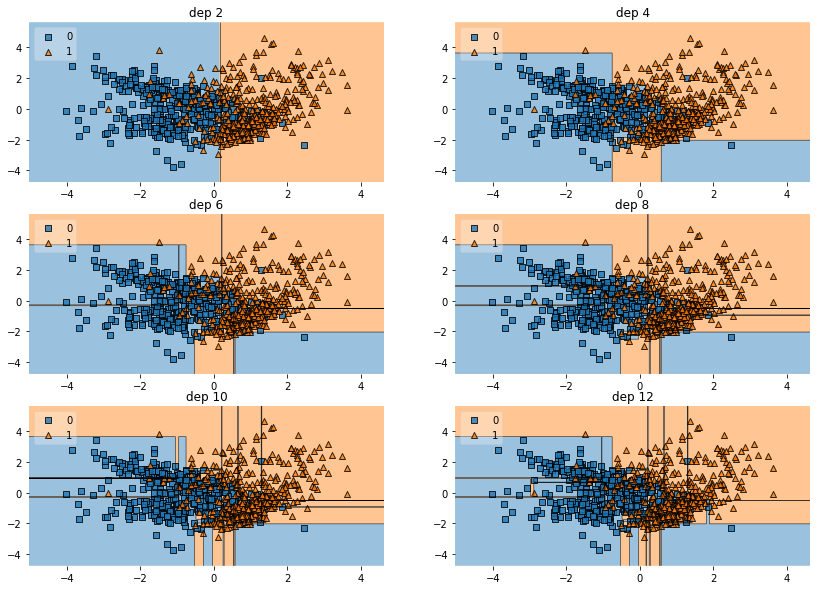

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import AdaBoostClassifier
# Initializing Classifiers
clf1 = DecisionTreeClassifier(max_depth=2)
clf2 = DecisionTreeClassifier(max_depth=4)
clf3 = DecisionTreeClassifier(max_depth=6)
clf4 = DecisionTreeClassifier(max_depth=8)
clf5 = DecisionTreeClassifier(max_depth=10)
clf6 = DecisionTreeClassifier(max_depth=12)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
%matplotlib inline  
gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(14,10))
labels = ['dep 2', 'dep 4', 'dep 6', 'dep 8', 'dep 10', 'dep 12']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)
plt.show()

## Exercise

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

#b. Split it into a training set and a test set using train_test_split().
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), cv=3)

grid_search_cv.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
import matplotlib.pyplot as plt

In [38]:
import numpy as np
def plot_learning_curve(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
    min_samples = np.arange(2, 100).astype('int')
    train_errors, test_errors=[],[]
    for min_sam in min_samples:
        model.set_params(min_samples_split=min_sam)
        model.fit(X_train, y_train)
        train_errors.append(model.score(X_train, y_train))
        test_errors.append(model.score(X_test, y_test))
    plt.plot(min_samples, train_errors, label="Train")
    plt.plot(min_samples, test_errors, label="Test")
    plt.legend(loc="upper right")
    plt.ylim([0.7, 1.01])
    plt.xlabel("min_samples_split")
    plt.ylabel("Performance")

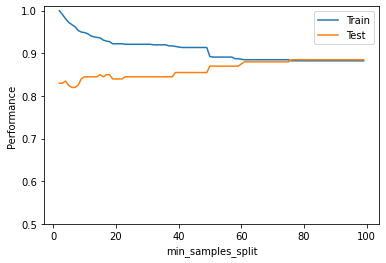

In [39]:
plot_learning_curve(tree,X,y)

In [70]:
y

array([1, 0, 0, ..., 1, 0, 1])

## feature importance

In [20]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [34]:
iris=load_iris()

In [42]:
rnd_clf=RandomForestClassifier()

In [36]:
rnd_clf.fit(iris.data,iris.target)

RandomForestClassifier()

In [25]:
rnd_clf.feature_importances_

array([0.10876067, 0.02273574, 0.44748379, 0.4210198 ])

In [28]:
for name, importance in zip(iris.feature_names, rnd_clf.feature_importances_):
    print(name, importance)

sepal length (cm) 0.10876066631123431
sepal width (cm) 0.022735744606384098
petal length (cm) 0.44748379020510504
petal width (cm) 0.42101979887727653


In [48]:
np.arange(1, 3).astype('int')

array([1, 2])

In [50]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])